1. Tạo 1 dataset gồm 10 điểm dữ liệu sinh từ hàm y=x^2+noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Thử thêm 100 điểm dữ liệu nữa xem hàm đa thức bậc 9 sẽ như thế nào

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
x_train = np.array(range(-5, 5)).astype('float32')
x_train = x_train.reshape(-1, 1)
print(x_train.shape)
y_train = x_train*x_train
for i in range(10):
    noise = np.random.rand(1)
    y_train[i] += noise
print(y_train.shape)

(10, 1)
(10, 1)


In [ ]:
reg = LinearRegression().fit(x_train, y_train)

<function matplotlib.pyplot.show>

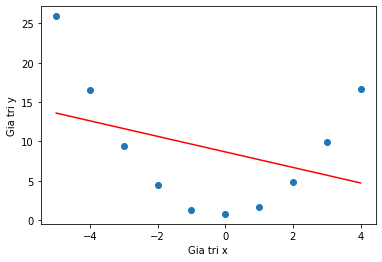

In [ ]:
import matplotlib.pyplot as plt
predict = reg.predict(x_train)
N = x_train.shape[0]
plt.plot((x_train[0][0], x_train[N-1][0]), (predict[0], predict[N-1]), 'r')
plt.scatter(x_train, y_train)
plt.xlabel('Gia tri x')
plt.ylabel('Gia tri y')
plt.show

In [ ]:
# fit đa thức bậc 9: y = x^9 + x + 1
x_train = np.hstack((x_train, np.power(x_train, 9)))
print(x_train)

[[-5.000000e+00 -1.953125e+06]
 [-4.000000e+00 -2.621440e+05]
 [-3.000000e+00 -1.968300e+04]
 [-2.000000e+00 -5.120000e+02]
 [-1.000000e+00 -1.000000e+00]
 [ 0.000000e+00  0.000000e+00]
 [ 1.000000e+00  1.000000e+00]
 [ 2.000000e+00  5.120000e+02]
 [ 3.000000e+00  1.968300e+04]
 [ 4.000000e+00  2.621440e+05]]


In [ ]:
reg1 = LinearRegression().fit(x_train, y_train)
print(reg1.coef_)
print(reg1.intercept_)

[[ 3.3016273e-01 -1.0202196e-05]]
[7.328542]


In [ ]:
a = []
b = []
for i in range(-5, 5):
    a.append(i)
    j = reg.coef_[0][0]*i + reg1.coef_[0][1]*np.power(i, 9) + reg1.intercept_
    b.append(j)

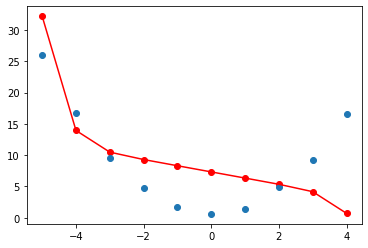

In [ ]:
predict = reg1.predict(x_train)
plt.scatter(a, b, c='r')
plt.plot(a, b, 'r')
plt.scatter(x_train[:, 0], y_train)

In [ ]:
x = np.array(range(-20, 80)).astype('float32')
x = x.reshape(-1, 1)
y = x*x
for i in range(100):
    y[i] += np.random.rand(1)


In [ ]:
x = np.hstack((x, np.power(x, 9)))

In [ ]:
reg = LinearRegression().fit(x, y)
print(reg.coef_)
print(reg.intercept_)

[[4.7589e-29 6.2960e-14]]
[1069.4116]


In [ ]:
a = []
b = []
for i in range(-20, 80):
    a.append(i)
    j = reg.intercept_ + reg.coef_[0][0]*i + reg.coef_[0][1]*np.power(i, 9)
    print(j)
    b.append(j)

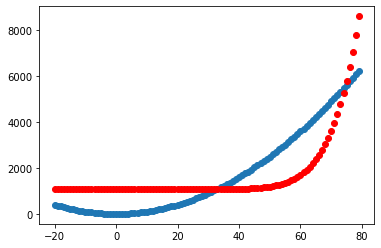

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], y)
plt.scatter(a, b, c='r')

2. Implement hàm tính convolution, input X, W, stride, padding, output Y. Implement hàm sobel

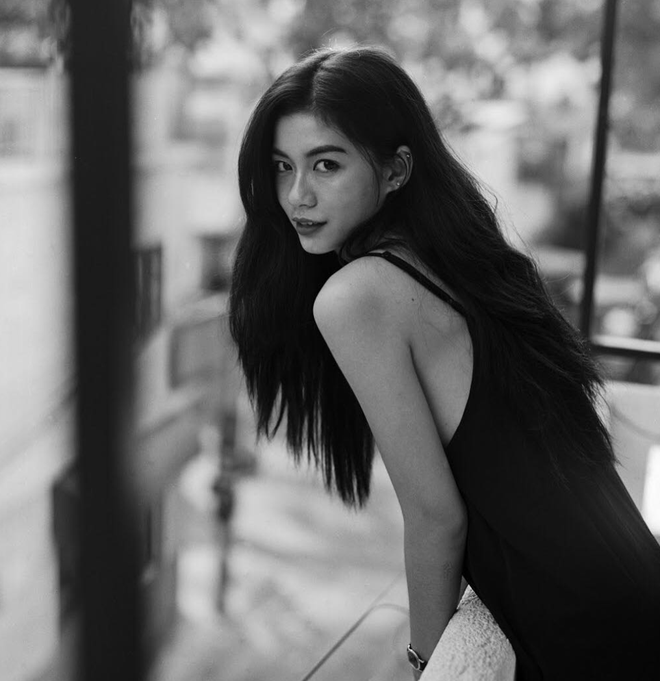

In [2]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab Notebooks/CNN/image#.png')

In [3]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CNN/image#.png', 0)
print(img.shape)

(681, 660)


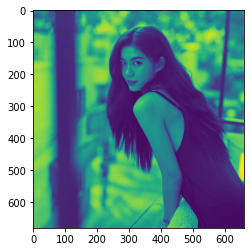

In [4]:
plt.imshow(img)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
filter = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])
def conv2d(X, filter, s, p):
    (w1, h1) = X.shape
    f = filter.shape[0]
    w2 = (w1 + 2*p - f)//s + 1
    h2 = (h1 + 2*p - f)//s + 1
    Y = np.zeros((w2, h2))
    X_pad = np.pad(X, pad_width=p, mode='constant', 
                                constant_values = 0)
    for i in range(w2):
        for j in range(h2):
            idw = i*s
            idh = j*s
            Y[i, j] = np.abs(np.sum(X_pad[idw:(idw+f), idh:(idh+f)] * filter))
    return Y

In [ ]:
print(img.shape)

(681, 660)


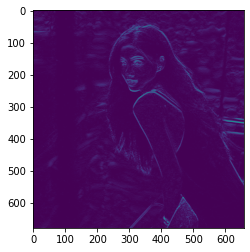

In [ ]:
Y1 = conv2d(X=img, filter=filter, s=1, p=0)
plt.imshow(Y1)

In [16]:
# implement sobel:
sobelX = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=7)
sobelY = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=7)
sobelXY = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=7)

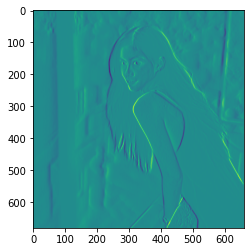

In [17]:
plt.imshow(sobelX)

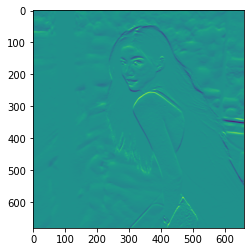

In [18]:
plt.imshow(sobelY)

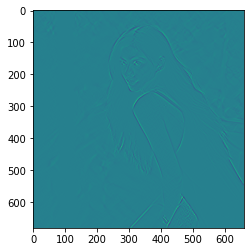

In [19]:
plt.imshow(sobelXY)

3. Hiểu code mẫu, chỉnh hyper như lr, optimizer, kernel size, số kernel,.... So sánh các kết quả.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10, mnist

In [ ]:
# split data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_val, y_val = X_train[50000:60000, :], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000,]
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)


In [ ]:
# reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
# nomalize
X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [ ]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train.shape)

(50000, 10)


In [ ]:
# model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Epoch 1/8
391/391 [==============================] - 69s 73ms/step - loss: 1.8929 - accuracy: 0.4760 - val_loss: 0.9481 - val_accuracy: 0.7813
Epoch 2/8
391/391 [==============================] - 28s 71ms/step - loss: 0.6030 - accuracy: 0.8369 - val_loss: 0.3828 - val_accuracy: 0.8916
Epoch 3/8
391/391 [==============================] - 27s 70ms/step - loss: 0.3717 - accuracy: 0.8927 - val_loss: 0.2972 - val_accuracy: 0.9150
Epoch 4/8
391/391 [==============================] - 29s 75ms/step - loss: 0.3003 - accuracy: 0.9113 - val_loss: 0.2502 - val_accuracy: 0.9296
Epoch 5/8
391/391 [==============================] - 28s 71ms/step - loss: 0.2596 - accuracy: 0.9225 - val_loss: 0.2252 - val_accuracy: 0.9341
Epoch 6/8
391/391 [==============================] - 28s 71ms/step - loss: 0.2299 - accuracy: 0.9323 - val_loss: 0.1973 - val_accuracy: 0.9436
Epoch 7/8
391/391 [==============================] - 28s 71ms/step - loss: 0.2071 - accuracy: 0.9382 - val_loss: 0.1849 - val_accuracy: 0.9473

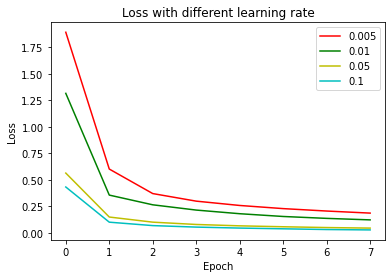

In [ ]:
# chỉnh các learning rate khác nhau
learning_rate = [0.005, 0.01, 0.05, 0.1]
colors = ['r', 'g', 'y', 'c']

for i, lr in enumerate(learning_rate):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                  metrics=['accuracy'])
    H = model.fit(X_train, y_train,
                  batch_size=128, epochs=8, verbose=1,
                  validation_data=(X_val, y_val))
    plt.plot(H.history['loss'], colors[i])

plt.title('Loss with different learning rate')
plt.legend(learning_rate)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

4. Build model tương tự VGG16 (có thể nông hơn) cho cifar10.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_val, y_val = x_train[40000:50000,:], y_train[40000:50000]
x_train , y_train = x_train[:40000, :], y_train[:40000]
print(x_train.shape, x_val.shape)

170508288/170498071 [==============================] - 5s 0us/step
(40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# normalize:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [ ]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # 16x16x64
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # 8x8x128
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 4x4x256
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # 2x2x512
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_156 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_157 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_107 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 16, 16, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train,
              batch_size=128, epochs=30, verbose=1,
              validation_data=(x_val, y_val))

Epoch 1/30
313/313 [==============================] - 30s 91ms/step - loss: 1.9752 - accuracy: 0.3362 - val_loss: 3.6386 - val_accuracy: 0.1173
Epoch 2/30
313/313 [==============================] - 28s 88ms/step - loss: 1.2677 - accuracy: 0.5432 - val_loss: 1.1223 - val_accuracy: 0.6136
Epoch 3/30
313/313 [==============================] - 28s 88ms/step - loss: 0.9749 - accuracy: 0.6548 - val_loss: 1.3769 - val_accuracy: 0.5689
Epoch 4/30
313/313 [==============================] - 28s 88ms/step - loss: 0.8282 - accuracy: 0.7141 - val_loss: 1.0690 - val_accuracy: 0.6303
Epoch 5/30
313/313 [==============================] - 28s 89ms/step - loss: 0.7218 - accuracy: 0.7514 - val_loss: 0.7343 - val_accuracy: 0.7571
Epoch 6/30
313/313 [==============================] - 28s 89ms/step - loss: 0.6475 - accuracy: 0.7807 - val_loss: 0.7028 - val_accuracy: 0.7624
Epoch 7/30
313/313 [==============================] - 28s 88ms/step - loss: 0.5835 - accuracy: 0.8030 - val_loss: 0.5517 - val_accuracy:

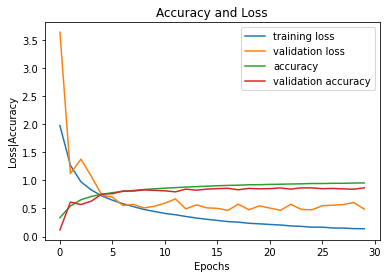

In [ ]:
plt.plot(np.arange(0, 30), H.history['loss'], label='training loss')
plt.plot(np.arange(0, 30), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, 30), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, 30), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.5197006464004517, 0.8651000261306763]


5. Tại sao khi build model, càng sâu thì width, height giảm nhưng depth tăng.

Khi build model, càng sâu thì width, height giảm để:

*   giảm chiều dữ liệu ảnh -> giảm số lượng phép tính
*   để các kernel tiếp sau học được các đặc trưng lớn hơn của ảnh

Depth tăng để học chi tiết hơn các đặc trưng của ảnh được trích xuất từ các layer trước

